<a href="https://colab.research.google.com/github/smit8800/PyTorch/blob/main/TrainNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
#Smit

torch.Size([1000, 2]) torch.Size([1000, 1])


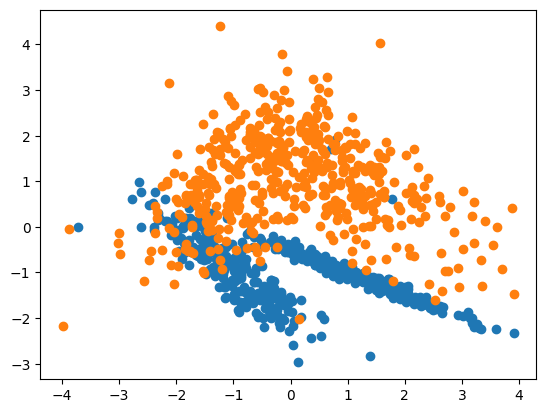

In [29]:
n_samples = 1000
X, Y = datasets.make_classification(n_samples=n_samples, n_features=2, n_classes=2,\
                                            n_informative=2, n_redundant=0, \
                                            n_repeated=0)
x = torch.FloatTensor(X)
y = torch.FloatTensor(Y.reshape(-1,1))
print(x.shape, y.shape)

zero = [i for i in range(len(Y)) if Y[i]==0]
one =  [i for i in range(len(Y)) if Y[i]==1]
plt.scatter(X[zero,0],X[zero,1])
plt.scatter(X[one,0],X[one,1])

In [34]:
class NN(torch.nn.Module):
  def __init__(self):
    super(NN, self).__init__()

    self.dense1 = torch.nn.Linear(2,2)
    self.relu1 = torch.nn.ReLU()
    self.dense2 = torch.nn.Linear(2,1)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self,input):

    out = self.dense1(input)
    out = self.relu1(out)
    out = self.dense2(out)
    return self.sigmoid(out)

In [37]:
learning_rate = 0.03
epochs = 2000

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = NN()
model = model.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch:  100  Loss:  0.2440589815378189
Epoch:  200  Loss:  0.2351345270872116
Epoch:  300  Loss:  0.2339501976966858
Epoch:  400  Loss:  0.2287241816520691
Epoch:  500  Loss:  0.22518396377563477
Epoch:  600  Loss:  0.22330990433692932
Epoch:  700  Loss:  0.2219049036502838
Epoch:  800  Loss:  0.22192944586277008
Epoch:  900  Loss:  0.2219211757183075
Epoch:  1000  Loss:  0.2219262421131134
Epoch:  1100  Loss:  0.2219226360321045
Epoch:  1200  Loss:  0.22192305326461792
Epoch:  1300  Loss:  0.2219306081533432
Epoch:  1400  Loss:  0.22192779183387756
Epoch:  1500  Loss:  0.2219259887933731
Epoch:  1600  Loss:  0.22193264961242676
Epoch:  1700  Loss:  0.22192557156085968
Epoch:  1800  Loss:  0.22193020582199097
Epoch:  1900  Loss:  0.2219250649213791
Epoch:  2000  Loss:  0.22193025052547455


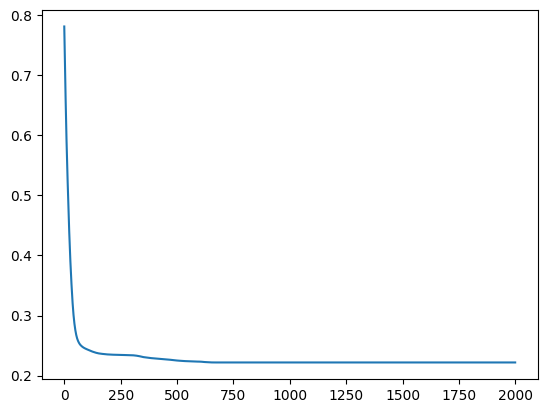

In [38]:
train_loss = []
i=0
while i<epochs:
  optimizer.zero_grad()

  model_pred = model.forward(x)
  loss = criterion(model_pred, y)
  loss.backward()
  optimizer.step()

  train_loss.append(loss.detach().item())
  i+=1
  if i%100==0: print('Epoch: ',i, ' Loss: ',train_loss[-1])

plt.plot(range(epochs), train_loss)

In [39]:
tmp_n = n_samples
wrong = 0
pred = model(x[:tmp_n])
actual_y = y[:tmp_n]

for i in range(tmp_n):
  if (pred[i]<=0.5 and actual_y[i]!=0):
    wrong+=1
  elif (pred[i]>0.5 and actual_y[i]!=1):
    wrong+=1
round(100-(wrong/tmp_n)*100,3)

92.5